# Bağlantı

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

adc.json  drive  sample_data


# Modul

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Yeni Bölüm

In [4]:
df = pd.read_csv('/content/drive/Colab Notebooks/covid/data.csv')
df.head()

,Unnamed: 0,Açıklamalar,Tarih,Toplam Vaka,Günlük Vaka,Toplam_Hasta,Gunluk_Hasta,Toplam_Vefat,Gunluk_Vefat,Toplam_iyilesen,Gunluk_iyilesen,Toplam_Test,Gunluk_Test,YBU,Entube,Ağır Hasta,yatak_doluluk_orani,eriskin_yogun_bakim_doluluk_orani,ventilator_doluluk_orani
0,1.0,Veri Seti,11.03.2020,1,NaN,1.0,1.0,NaN,NaN,NaN,NaN,940,940.00,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,COVID-19 Pandemisi Türkiye Günlük Verileri,12.03.2020,1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,2.470,1.53,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Son Güncelleme,13.03.2020,5,NaN,2.0,1.0,NaN,NaN,NaN,NaN,4.000,1.53,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,06.10.2021,14.03.2020,6,NaN,5.0,3.0,NaN,NaN,NaN,NaN,5.000,1.00,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,Kapsam,15.03.2020,18,NaN,18.0,13.0,NaN,NaN,NaN,NaN,6.000,1.00,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Unnamed: 0', 'Açıklamalar', 'Tarih', 'Toplam Vaka', 'Günlük Vaka',
       'Toplam_Hasta', 'Gunluk_Hasta', 'Toplam_Vefat', 'Gunluk_Vefat',
       'Toplam_iyilesen', 'Gunluk_iyilesen', 'Toplam_Test', 'Gunluk_Test',
       'YBU', 'Entube', 'Ağır Hasta', 'yatak_doluluk_orani',
       'eriskin_yogun_bakim_doluluk_orani', 'ventilator_doluluk_orani'],
      dtype='object')

In [6]:
df.tail

<bound method NDFrame.tail of      Unnamed: 0  ... ventilator_doluluk_orani
0           1.0  ...                      NaN
1           NaN  ...                      NaN
2           2.0  ...                      NaN
3           NaN  ...                      NaN
4           3.0  ...                      NaN
..          ...  ...                      ...
569         NaN  ...                      NaN
570         NaN  ...                      NaN
571         NaN  ...                      NaN
572         NaN  ...                      NaN
573         NaN  ...                      NaN

[574 rows x 19 columns]>

In [7]:
df.describe()

,Unnamed: 0,Günlük Vaka,Toplam_Hasta,Gunluk_Hasta,Toplam_Vefat,Gunluk_Vefat,Gunluk_iyilesen,Gunluk_Test,YBU,Entube,Ağır Hasta
count,9.000000,315.000000,481.000000,481.000000,568.000000,568.000000,558.000000,574.000000,124.000000,124.000000,339.000000
mean,5.000000,19.205660,453.502031,249.683734,35.202995,114.616197,74.195918,155.175031,323.886081,438.697419,129.535552
std,2.738613,13.535653,271.181737,358.201297,77.156839,89.702058,226.208136,100.793096,386.570369,251.897195,284.933476
min,1.000000,4.418000,1.000000,0.000000,1.000000,1.000000,-173.318000,1.000000,1.018000,1.006000,1.009000
25%,3.000000,7.768000,212.993000,1.592000,6.202500,48.000000,1.859250,53.575000,1.248750,307.500000,1.451000
50%,5.000000,15.805000,394.187000,2.936000,23.410000,79.500000,6.641500,147.289000,1.811500,386.500000,2.468000
75%,7.000000,27.353500,697.239000,610.000000,47.684000,182.250000,22.016750,223.717750,722.250000,545.250000,4.810500
max,9.000000,63.082000,947.000000,996.000000,908.000000,394.000000,997.000000,940.000000,998.000000,995.000000,997.000000


# Boş Değerleri Doldurma

In [8]:
df.isnull().sum()

Unnamed: 0                           565
Açıklamalar                          550
Tarih                                  0
Toplam Vaka                            0
Günlük Vaka                          259
Toplam_Hasta                          93
Gunluk_Hasta                          93
Toplam_Vefat                           6
Gunluk_Vefat                           6
Toplam_iyilesen                       16
Gunluk_iyilesen                       16
Toplam_Test                            0
Gunluk_Test                            0
YBU                                  450
Entube                               450
Ağır Hasta                           235
yatak_doluluk_orani                  518
eriskin_yogun_bakim_doluluk_orani    518
ventilator_doluluk_orani             518
dtype: int64

In [9]:
#boş değerleri ortalama ile doldurma
df['Günlük Vaka'] = df['Günlük Vaka'].fillna(df['Günlük Vaka'].mean())
df['Toplam_Hasta']= df['Toplam_Hasta'].fillna(df['Toplam_Hasta'].mean())
df['Gunluk_Hasta'] = df['Gunluk_Hasta'].fillna(df['Gunluk_Hasta'].mean())
df['Toplam_Vefat'] = df['Toplam_Vefat'].fillna(df['Toplam_Vefat'].mean())
df['Gunluk_Vefat'] = df['Gunluk_Vefat'].fillna(df['Gunluk_Vefat'].mean())
df['Toplam_iyilesen'] = df['Toplam_iyilesen'].fillna(df['Toplam_iyilesen'].mode()[0])
df['Gunluk_iyilesen'] = df['Gunluk_iyilesen'].fillna(df['Gunluk_iyilesen'].mean())
df['YBU']= df['YBU'].fillna(df['YBU'].mean())
df['Entube'] = df['Entube'].fillna(df['Entube'].mean())
df['Ağır Hasta'] = df['Ağır Hasta'].fillna(df['Ağır Hasta'].mean())
#df['yatak_doluluk_orani'] = df['Ayatak_doluluk_orani'].fillna(df['yatak_doluluk_orani'].mode()[0])
df['eriskin_yogun_bakim_doluluk_orani'] = df['eriskin_yogun_bakim_doluluk_orani'].fillna(df['eriskin_yogun_bakim_doluluk_orani'].mode()[0])

In [10]:
df.dropna(inplace=True,how="all")

In [11]:
df.isnull().sum()

Unnamed: 0                           565
Açıklamalar                          550
Tarih                                  0
Toplam Vaka                            0
Günlük Vaka                            0
Toplam_Hasta                           0
Gunluk_Hasta                           0
Toplam_Vefat                           0
Gunluk_Vefat                           0
Toplam_iyilesen                        0
Gunluk_iyilesen                        0
Toplam_Test                            0
Gunluk_Test                            0
YBU                                    0
Entube                                 0
Ağır Hasta                             0
yatak_doluluk_orani                  518
eriskin_yogun_bakim_doluluk_orani      0
ventilator_doluluk_orani             518
dtype: int64

# Gorseleştirme

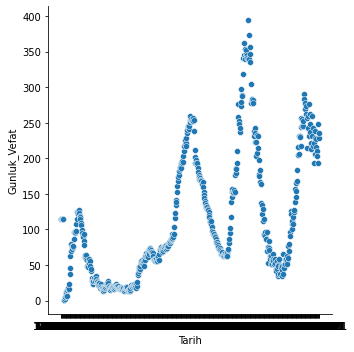

In [12]:
#sns.set(rc={'figure.figsize':(11.7,40)})
sns.relplot(x='Tarih', y='Gunluk_Vefat', data=df)

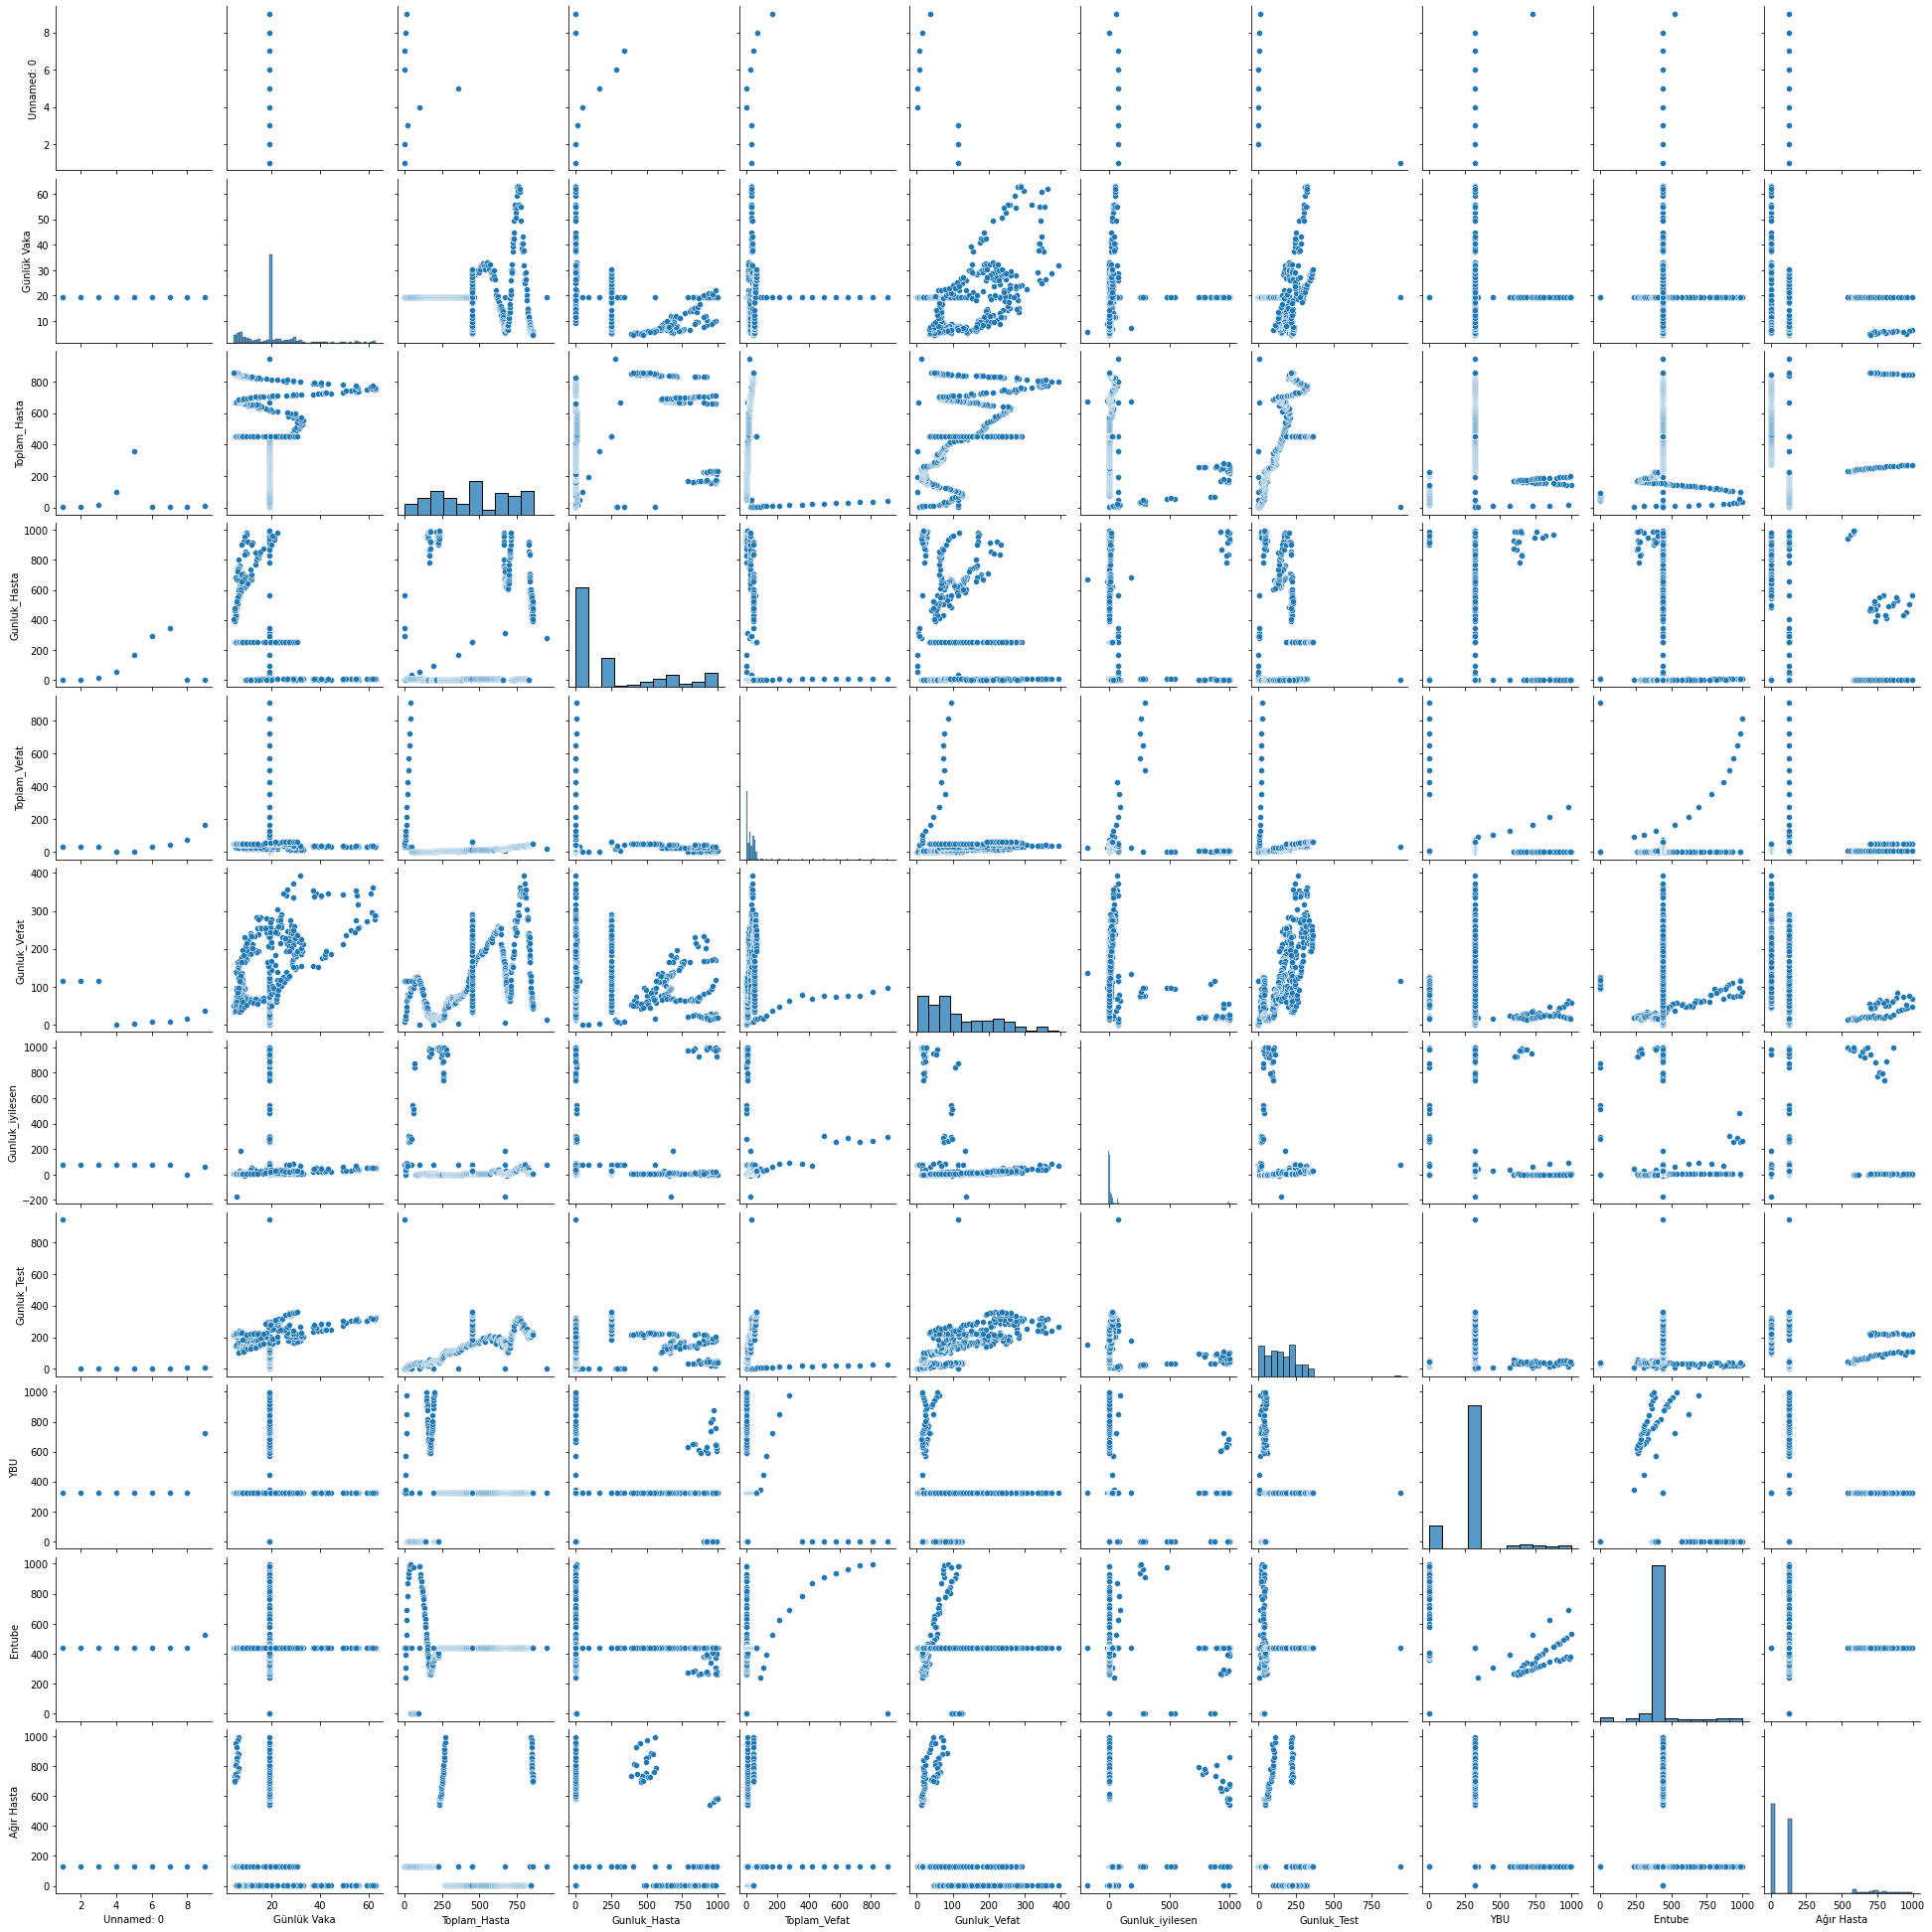

In [13]:
sns.pairplot(df)

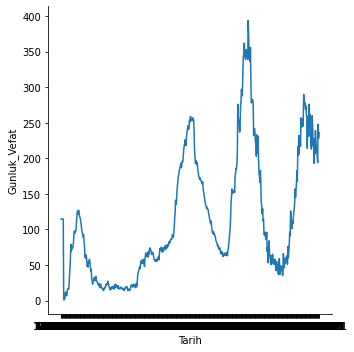

In [14]:
sns.relplot(x='Tarih', y='Gunluk_Vefat', kind='line', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


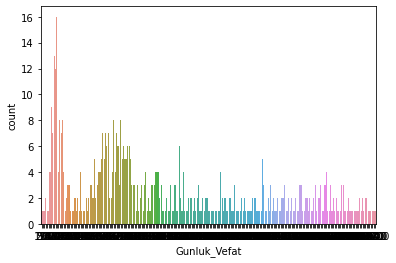

In [15]:
sns.countplot(df['Gunluk_Vefat'])

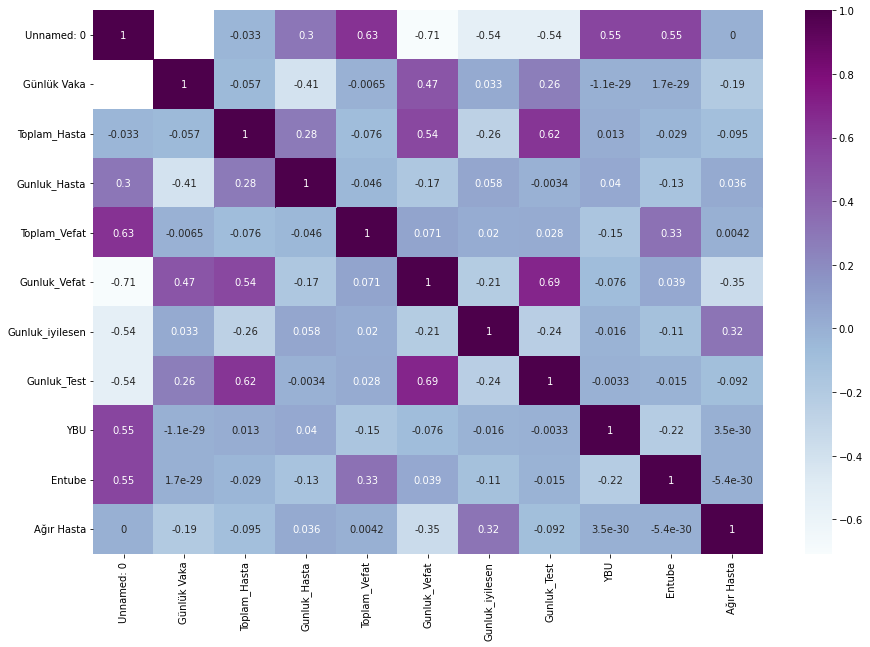

In [16]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot= True, cmap="BuPu")

In [17]:
df.isnull().sum()

Unnamed: 0                           565
Açıklamalar                          550
Tarih                                  0
Toplam Vaka                            0
Günlük Vaka                            0
Toplam_Hasta                           0
Gunluk_Hasta                           0
Toplam_Vefat                           0
Gunluk_Vefat                           0
Toplam_iyilesen                        0
Gunluk_iyilesen                        0
Toplam_Test                            0
Gunluk_Test                            0
YBU                                    0
Entube                                 0
Ağır Hasta                             0
yatak_doluluk_orani                  518
eriskin_yogun_bakim_doluluk_orani      0
ventilator_doluluk_orani             518
dtype: int64

In [18]:
#  Gereksiz sutunları çıkarma
cols = ['Açıklamalar', 'ventilator_doluluk_orani', "yatak_doluluk_orani", 'Tarih']
df = df.drop(columns=cols, axis=1)
df.head()

,Unnamed: 0,Toplam Vaka,Günlük Vaka,Toplam_Hasta,Gunluk_Hasta,Toplam_Vefat,Gunluk_Vefat,Toplam_iyilesen,Gunluk_iyilesen,Toplam_Test,Gunluk_Test,YBU,Entube,Ağır Hasta,eriskin_yogun_bakim_doluluk_orani
0,1.0,1,19.20566,1.0,1.0,35.202995,114.616197,0,74.195918,940,940.00,323.886081,438.697419,129.535552,"63,30%"
1,NaN,1,19.20566,1.0,0.0,35.202995,114.616197,0,74.195918,2.470,1.53,323.886081,438.697419,129.535552,"63,30%"
2,2.0,5,19.20566,2.0,1.0,35.202995,114.616197,0,74.195918,4.000,1.53,323.886081,438.697419,129.535552,"63,30%"
3,NaN,6,19.20566,5.0,3.0,35.202995,114.616197,0,74.195918,5.000,1.00,323.886081,438.697419,129.535552,"63,30%"
4,3.0,18,19.20566,18.0,13.0,35.202995,114.616197,0,74.195918,6.000,1.00,323.886081,438.697419,129.535552,"63,30%"


In [19]:
x = df.drop(columns=['Toplam_Vefat'], axis=1)
y = df['Toplam_Vefat']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf_model = RandomForestRegressor(random_state= 42).fit(x_train, y_train) # her defasında farklılık olmuşmaması için
rf_model

# Model Training

In [ ]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print('Cross validation is,', np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Model Training

In [ ]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print('Cross validation is,', np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)

In [ ]:
model = ExtraTreesClassifier()
classify(model, x, y)